In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import gym

In [5]:
import time

In [6]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [7]:
#env = gym.make('FrozenLakeNotSlippery-v0')
#env = gym.make('FrozenLake-v0')
env = gym.make('Taxi-v3')

In [8]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [9]:
Q=torch.zeros([number_of_states,number_of_actions])

In [10]:
gamma=0.95

In [11]:
learning_rate=0.9

In [12]:
egreedy=0.9
egreedy_final=0.01
egreedy_decay=0.999

In [13]:
%%time


num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)

for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    
    #undiscounted reward for the episode
    current_total_reward=0
    while True:
        
        step+=1
        
        #action=env.action_space.sample()
        Q_eps=1e-6*torch.randn([number_of_actions])
        random_for_egreedy=torch.rand(1).item()
        
        if random_for_egreedy>egreedy:
            action=torch.argmax(Q[state]+Q_eps).item()
        else:
            action=env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        current_total_reward+=reward
        
        if egreedy>egreedy_final:
            egreedy*=egreedy_decay
        
        Q[state,action]=(1.0-learning_rate)*Q[state,action]+learning_rate*(reward+gamma *torch.max(Q[new_state]).item())
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=current_total_reward
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 139
Episode finished after: 200
Episode finished after: 200
Episode finished after: 186
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 38
Episode finished after: 171
Episode finished after: 200
Episode finished after: 200
Episode finished after: 95
Episode finished after: 200
Episode finished after: 185
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 180
Episode finished after: 141
Episode finished after: 200
Episode finished after: 200
Episode finished after: 137
Episode finished after: 182
Episode finished after: 185
Episode finished after

Episode finished after: 28
Episode finished after: 15
Episode finished after: 11
Episode finished after: 21
Episode finished after: 19
Episode finished after: 17
Episode finished after: 13
Episode finished after: 11
Episode finished after: 14
Episode finished after: 12
Episode finished after: 10
Episode finished after: 6
Episode finished after: 20
Episode finished after: 18
Episode finished after: 17
Episode finished after: 14
Episode finished after: 13
Episode finished after: 10
Episode finished after: 18
Episode finished after: 15
Episode finished after: 30
Episode finished after: 13
Episode finished after: 9
Episode finished after: 13
Episode finished after: 15
Episode finished after: 12
Episode finished after: 23
Episode finished after: 10
Episode finished after: 14
Episode finished after: 17
Episode finished after: 14
Episode finished after: 15
Episode finished after: 9
Episode finished after: 10
Episode finished after: 7
Episode finished after: 14
Episode finished after: 16
Episo

Episode finished after: 13
Episode finished after: 13
Episode finished after: 19
Episode finished after: 14
Episode finished after: 13
Episode finished after: 13
Episode finished after: 6
Episode finished after: 12
Episode finished after: 9
Episode finished after: 9
Episode finished after: 12
Episode finished after: 6
Episode finished after: 10
Episode finished after: 16
Episode finished after: 8
Episode finished after: 14
Episode finished after: 14
Episode finished after: 11
Episode finished after: 11
Episode finished after: 6
Episode finished after: 9
Episode finished after: 12
Episode finished after: 13
Episode finished after: 13
Episode finished after: 10
Episode finished after: 11
Episode finished after: 10
Episode finished after: 18
Episode finished after: 18
Episode finished after: 19
Episode finished after: 12
Episode finished after: 10
Episode finished after: 19
Episode finished after: 14
Episode finished after: 14
Episode finished after: 10
Episode finished after: 14
Episode 

In [14]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 29.161


In [15]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 13.02


In [16]:
print("Average total undiscounted reward {}".format(np.average(rewards_total)))

Average total undiscounted reward -18.74799919128418


In [17]:
print("Average total undiscounted reward in the last 100 episodes {}".format(np.average(rewards_total[-100:])))

Average total undiscounted reward in the last 100 episodes 7.440000057220459


In [18]:
print(Q)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-6.6880, -6.1625, -6.6766, -6.1625,  5.2100, -9.0000],
        [-4.7714, -4.1877, -4.8936, -4.8277, 10.9512, -9.0000],
        ...,
        [-3.3642,  9.2969, -3.3642, -3.9717, -9.0000, -9.0000],
        [-5.5856, -5.5700, -5.5105, -5.7138, -9.0000, -9.0000],
        [-0.9000, -0.9000, -1.7595, 18.0000, -9.0000, -9.0000]])


In [19]:
#print(rewards_total)

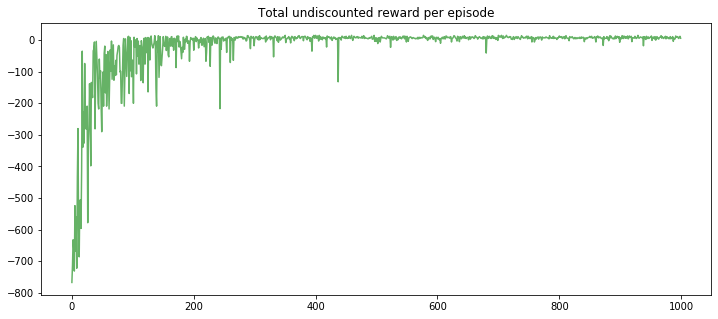

In [20]:
plt.figure(1,figsize=[12,5])
plt.title("Total undiscounted reward per episode")
plt.plot(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

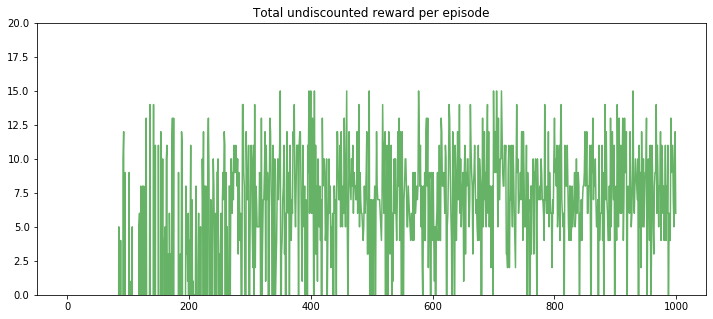

In [21]:
plt.figure(13,figsize=[12,5])
plt.title("Total undiscounted reward per episode")
plt.plot(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.ylim(0.0,20.0)
plt.show()

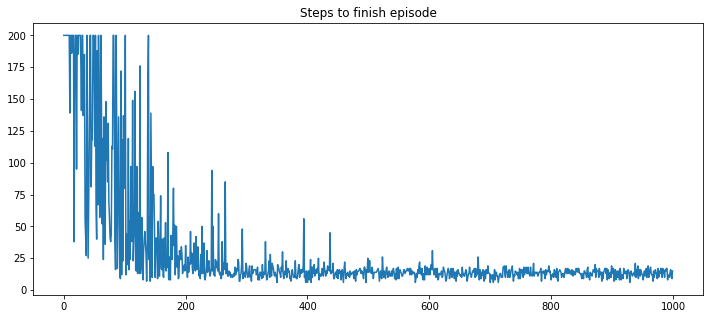

In [22]:
plt.figure(3,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

In [23]:
print(Q)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-6.6880, -6.1625, -6.6766, -6.1625,  5.2100, -9.0000],
        [-4.7714, -4.1877, -4.8936, -4.8277, 10.9512, -9.0000],
        ...,
        [-3.3642,  9.2969, -3.3642, -3.9717, -9.0000, -9.0000],
        [-5.5856, -5.5700, -5.5105, -5.7138, -9.0000, -9.0000],
        [-0.9000, -0.9000, -1.7595, 18.0000, -9.0000, -9.0000]])
